# IMDB - Embedding with LSTM
> # NLP(Natural Language Processing)

## Import Keras

- Keras Version 확인

In [1]:
import keras
keras.__version__

'2.4.3'

# 1. IMDB Date_Set Load & Review

> ## 1) Load IMDB Data_Set

- Word to Vector
- 전체 데이터 내에서 단어의 사용 빈도에 따라 인덱스화
- 정수 인덱스 '11'은 11번째로 자주 사용된 단어를 나타냄
- num_words = 10000 : 인덱스 값 10000 이하의 단어만 추출
- 단어 인덱스 값이 10000을 넘지 않는 단어만 분석에 사용용

In [2]:
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

> ## 2) Visualization & Frquency(Optional)

- x - Histogram(리뷰 길이)

리뷰 최대 길이 : 2494
리뷰 평균 길이 : 238.71364


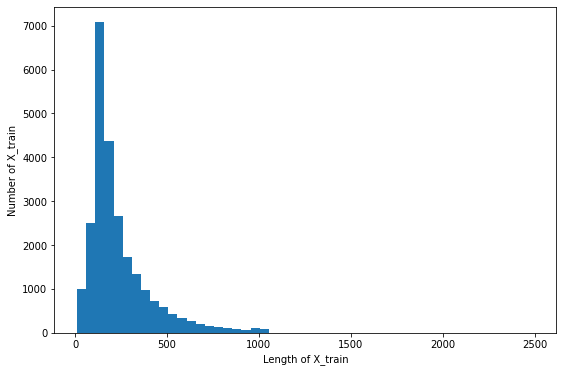

In [3]:
import matplotlib.pyplot as plt

print('리뷰 최대 길이 :', max(len(L) for L in X_train))
print('리뷰 평균 길이 :', sum(map(len, X_train)) / len(X_train))

plt.figure(figsize = (9, 6))
plt.hist([len(L) for L in X_train], bins = 50)
plt.xlabel('Length of X_train')
plt.ylabel('Number of X_train')
plt.show()

- y - Frequence(0 : 부정, 1 : 긍정)

In [4]:
import numpy as np

unique_elements, counts_elements = np.unique(y_train, return_counts = True)

print('Label 빈도수:')
print(np.asarray((unique_elements, counts_elements)))

Label 빈도수:
[[    0     1]
 [12500 12500]]


# 2. Tensor Transformation

> ## 1) X_train & X_test : (25000, 10000)

- vectorization
   - (25000, 10000)

In [5]:
from keras import preprocessing

X_train = preprocessing.sequence.pad_sequences(X_train, maxlen = 10000)
X_test = preprocessing.sequence.pad_sequences(X_test, maxlen = 10000)

X_train.shape, X_test.shape

((25000, 10000), (25000, 10000))

- Transformation Check

In [6]:
print(X_train[0][:21])
print(X_train[0][9979:])    
print(X_test[0][:21])
print(X_test[0][9979:])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[ 226   65   16   38 1334   88   12   16  283    5   16 4472  113  103
   32   15   16 5345   19  178   32]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  14  286  170    8  157   46    5   27  239   16  179    2   38   32
   25 7944  451  202   14    6  717]


> ## 2) y_train & y_test

In [7]:
y_train = np.asarray(y_train).astype(float)
y_test = np.asarray(y_test).astype(float)

print(y_train[:21])
print(y_test[:21])

[1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]
[0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]


# 3. Keras Embedding Modeling

> ## 1) Model Define

- 모델 신경망 구조 정의
   - Embedding Dimension : 32

In [8]:
from keras import models
from keras import layers

imdb = models.Sequential()

imdb.add(layers.Embedding(10000, 32, input_length = 10000)) # 10000개의 데이터의 32개의 밀집 행렬로 만들어진다.

imdb.add(layers.LSTM(8))
imdb.add(layers.Dropout(0.5))
imdb.add(layers.Dense(1, activation = 'sigmoid'))

# 가운데 임베딩 레이어가 32층 

- 모델 구조 확인

In [9]:
imdb.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10000, 32)         320000    
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 1312      
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 321,321
Trainable params: 321,321
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

- 모델 학습방법 설정

In [10]:
imdb.compile(loss = 'binary_crossentropy',  # 긍정 부정을 분류하기 위해 이진 분류
             optimizer = 'adam',
             metrics = ['accuracy'])

> ## 3) Model Fit

- 약 17분

In [11]:
%%time

hist_imdb = imdb.fit(X_train, y_train,
                     epochs = 25,
                     batch_size = 512,
                     validation_data = (X_test, y_test))

Epoch 1/25
49/49 [==============================] - 72s 804ms/step - loss: 0.6898 - accuracy: 0.5650 - val_loss: 0.6506 - val_accuracy: 0.6647
Epoch 2/25
49/49 [==============================] - 39s 793ms/step - loss: 0.5980 - accuracy: 0.7558 - val_loss: 0.5024 - val_accuracy: 0.8200
Epoch 3/25
49/49 [==============================] - 39s 791ms/step - loss: 0.4720 - accuracy: 0.8424 - val_loss: 0.4244 - val_accuracy: 0.8334
Epoch 4/25
49/49 [==============================] - 39s 793ms/step - loss: 0.3914 - accuracy: 0.8748 - val_loss: 0.3760 - val_accuracy: 0.8559
Epoch 5/25
49/49 [==============================] - 39s 793ms/step - loss: 0.3416 - accuracy: 0.8964 - val_loss: 0.3552 - val_accuracy: 0.8610
Epoch 6/25
49/49 [==============================] - 38s 789ms/step - loss: 0.2965 - accuracy: 0.9170 - val_loss: 0.3336 - val_accuracy: 0.8682
Epoch 7/25
49/49 [==============================] - 39s 792ms/step - loss: 0.2595 - accuracy: 0.9321 - val_loss: 0.3326 - val_accuracy: 0.8646

> ## 4) 학습 결과 시각화

- Loss Visualization

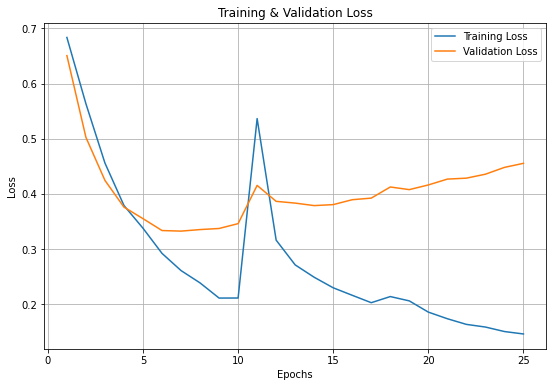

In [12]:
import matplotlib.pyplot as plt

epochs = range(1, len(hist_imdb.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_imdb.history['loss'])
plt.plot(epochs, hist_imdb.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

- Accuracy Visualization

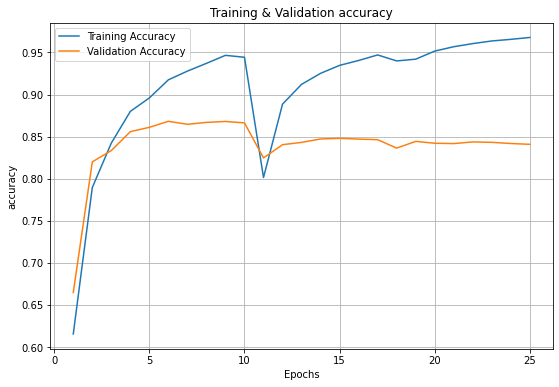

In [13]:
import matplotlib.pyplot as plt

epochs = range(1, len(hist_imdb.history['accuracy']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_imdb.history['accuracy'])
plt.plot(epochs, hist_imdb.history['val_accuracy'])
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

- Loss & Accuracy

In [14]:
loss, accuracy = imdb.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))
# 정확도 84%

782/782 [==============================] - 85s 109ms/step - loss: 0.4554 - accuracy: 0.8408
Loss = 0.45537
Accuracy = 0.84084


###
#The End
###